In [46]:
from Utils import paths, common_functions
import pandas as pd
import matplotlib.pyplot as plt

COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [47]:
fhr = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/fhr.pickle")
uc = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/uc.pickle")
y = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/y.pickle")

fhr.shape, uc.shape, y.shape

((552, 21620), (552, 21620), (552,))

In [48]:
before_dismissed = [1104, 1119, 1134, 1149, 1155, 1158, 1186, 1188, 1258, 1292, 1322,
                    1327, 1451, 1477, 1482, 2003]

15 5 533 True
15 10 506 True
15 20 427 True
15 30 349 True
20 5 535 True
20 10 501 True
20 20 412 True
20 30 328 True
30 5 539 True
30 10 499 True
30 20 401 True
30 30 295 True


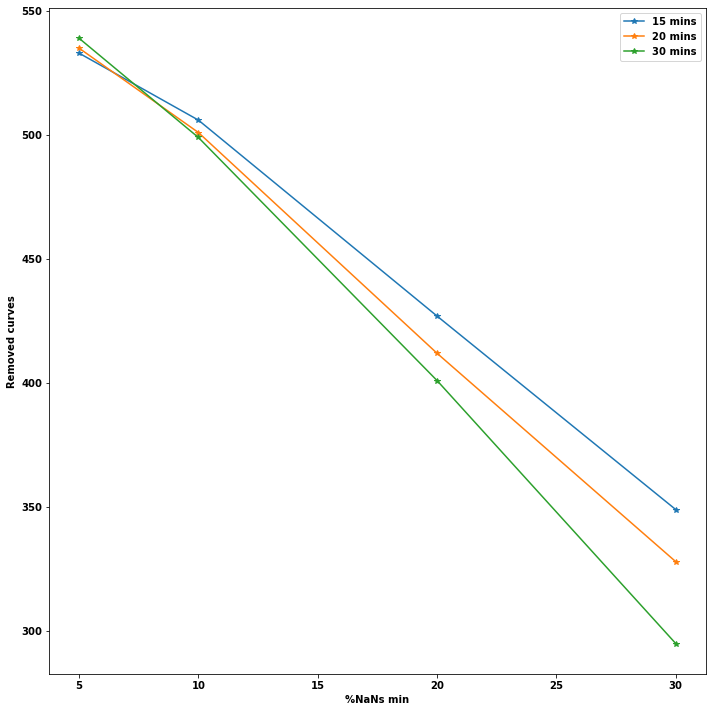

In [56]:
# mins_cut = 30
# nan_percentage_threshold = 30


fig, ax = plt.subplots(1,1, figsize=(10, 10))
nan_percentage_thresholds = [5, 10, 20, 30]
for mins_cut in [15, 20, 30]:
    results = []
    for nan_percentage_threshold in nan_percentage_thresholds:
        cut_fhr = fhr.copy().iloc[:, -mins_cut*60*4:]
        fhr_nans_percent = (cut_fhr.isna().sum(axis=1) / cut_fhr.shape[1] * 100)
        fhr_now_dismissed = fhr_nans_percent.index[fhr_nans_percent > nan_percentage_threshold].to_list()

        cut_uc = uc.copy().iloc[:, -mins_cut*60*4:]
        uc_nans_percent = (cut_uc.isna().sum(axis=1) / cut_fhr.shape[1] * 100)
        uc_now_dismissed = uc_nans_percent.index[uc_nans_percent > nan_percentage_threshold].to_list()

        removed = list(set(fhr_now_dismissed).union(set(uc_now_dismissed)))
        check_list = [x for x in before_dismissed if (x not in fhr_now_dismissed) and (x not in uc_now_dismissed)]
        print(f"{mins_cut} {nan_percentage_threshold} {len(removed)} {len(check_list) == 0}")
        results.append(len(removed))
    ax.plot(nan_percentage_thresholds, results, '*-', label=f"{mins_cut} mins")
ax.legend()
ax.set_ylabel('Removed curves')
ax.set_xlabel('%NaNs min')
# ax.set_yscale('log')
fig.tight_layout()

506